**Building the Image Dataset**

**Download Datests**

In [1]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2023-03-17 07:33:21--  https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/train.zip [following]
--2023-03-17 07:33:21--  https://github.com/btphan95/simple-cnn/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip [following]
--2023-03-17 07:33:21--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [2]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2023-03-17 07:33:44--  https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/valid.zip [following]
--2023-03-17 07:33:44--  https://github.com/btphan95/simple-cnn/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip [following]
--2023-03-17 07:33:44--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19

**Import Library**

In [4]:
#Import Library OS/Zipfile
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/tmp/valid/grass')

**Melihat seperti apa nama file di training directory dandelion dan rumput :**

In [6]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000015.jpg', '00000413.jpg', '00000166.jpg', '00000070.jpg', '00000351.jpg', '00000465.jpg', '00000410.jpg', '00000302.jpg', '00000028.jpg', '00000018.jpg']
['00000015.jpg', '00000413.jpg', '00000166.jpg', '00000070.jpg', '00000351.jpg', '00000465.jpg', '00000410.jpg', '00000302.jpg', '00000028.jpg', '00000018.jpg']
['00000015.jpg', '00000070.jpg', '00000028.jpg', '00000018.jpg', '00000051.jpg', '00000007.jpg', '00000041.jpg', '00000003.jpg', '00000087.jpg', '00000062.jpg']
['00000015.jpg', '00000028.jpg', '00000018.jpg', '00000051.jpg', '00000007.jpg', '00000041.jpg', '00000003.jpg', '00000062.jpg', '00000011.jpg', '00000032.jpg']


Mencari informasi berapa total images dari dandelion dan rumput di directory:

In [7]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training rumput images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation rumput images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training rumput images: 499
total validation dandelion images: 92
total validation rumput images: 65


**Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa. Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:**

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

train_dir = 'C:/Users/USER/Downloads/dataset_cnn/train'
valid_dir = 'C:/Users/USER/Downloads/dataset_cnn/valid'

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

**Menampilkan 8 batch dari 8 dandelion and 8 rumput pictures. Kamu bisa melakukan rerun cell kembali untuk melihat fresh batch setiap waktu:**

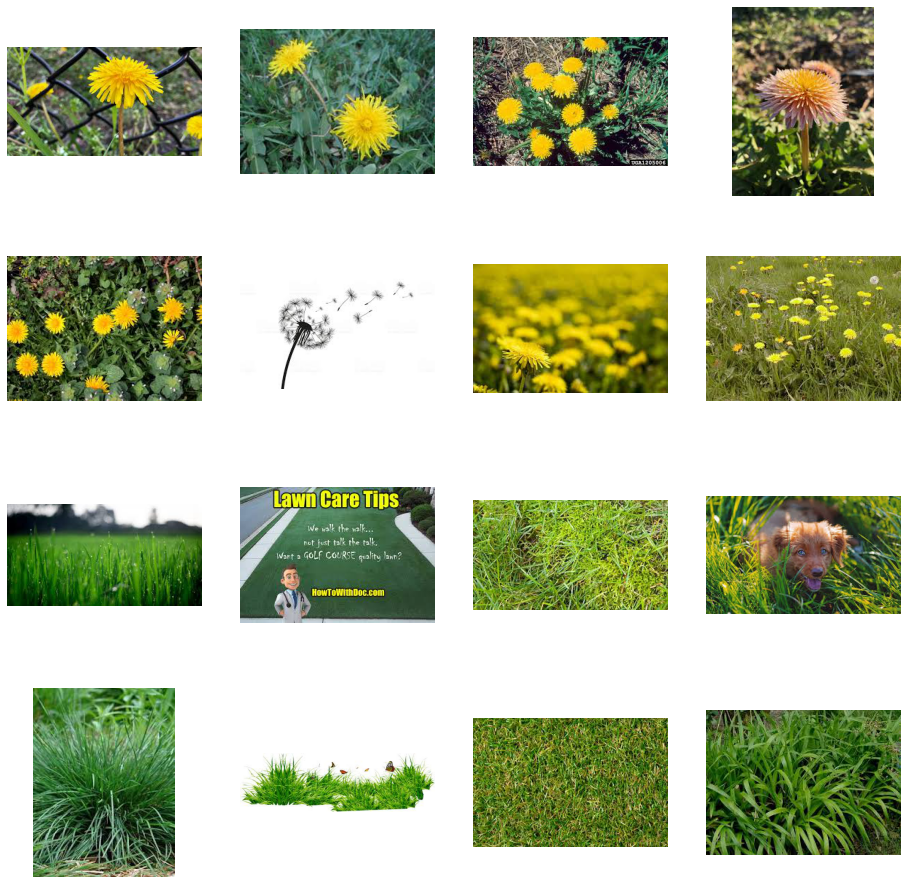

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname) 
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Data Preprocessing**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(132, 132),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(132, 132),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


**Building the Model from Transfer Learning dengan menggunakan Arsitektur MobilNetV2**

Memulai menentukan model:

Step 1 import tensorflow.

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

**Menggunakan Arsitektur MobilNetV2**

In [15]:
# Initializing MobileNetV2 (pretrained) model with input image shape as (132, 132, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(132, 132, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [16]:
# Adding some more layers at the end of the model as per our requirement
model = tf.keras.models.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [17]:
# Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,422,081
Trainable params: 2,387,969
Non-trainable params: 34,112
_________________________________________________________________


**Model Compile**

In [18]:
# Compiling the model with optimizer adam and loss function binary crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training Process**

In [19]:
# Training the model
history = model.fit(train_generator, 
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 125s 12s/step - loss: 0.2899 - accuracy: 0.8623 - val_loss: 3.8121 - val_accuracy: 0.6316
Epoch 2/15
8/8 [==============================] - 96s 11s/step - loss: 0.0905 - accuracy: 0.9716 - val_loss: 5.6062 - val_accuracy: 0.6579
Epoch 3/15
8/8 [==============================] - 92s 11s/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 11.6357 - val_accuracy: 0.6184
Epoch 4/15
8/8 [==============================] - 85s 11s/step - loss: 0.0383 - accuracy: 0.9886 - val_loss: 24.9224 - val_accuracy: 0.4539
Epoch 5/15
8/8 [==============================] - 86s 12s/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 21.0992 - val_accuracy: 0.4671
Epoch 6/15
8/8 [==============================] - 86s 11s/step - loss: 0.0078 - accuracy: 0.9966 - val_loss: 17.7285 - val_accuracy: 0.5066
Epoch 7/15
8/8 [==============================] - 85s 12s/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 10.1213 - val_accuracy: 0.6118
Epoch 8/15
8/8 [=====

**Accuracy, ROC Curve, and AUC**

Evaluasi accuracy model:

In [20]:
model.evaluate(validation_generator)

9/9 [==============================] - 3s 259ms/step - loss: 9.3586 - accuracy: 0.6943


[9.358644485473633, 0.6942675113677979]

Kalkulasi ROC curve dan lakukan plotting.

Lakukan prediction di validation set. Ketika menggunakan generators untuk membuat predictions, Kita matikan shuffle (seperti yang kita lakukan ketika kita membuat validation_generator) dan reset the generator:

In [21]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

9/9 [==============================] - 3s 221ms/step


Untuk membuat ROC curve dan AUC, kita harus menghitung false-positive rate dan true-positive rate:

In [23]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [24]:
roc_auc = auc(fpr, tpr)

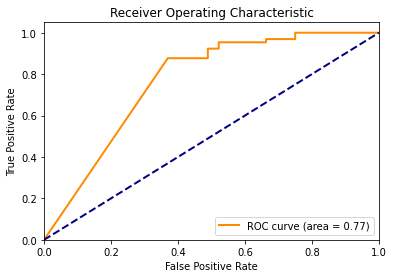

In [25]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
model.save('model_2.h5')

**Making Predictions**

Saving rumput.jpg to rumput (1).jpg
1/1 [==============================] - 0s 45ms/step
[1.]
rumput.jpg ini adalah rumput


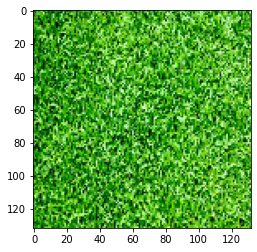

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# from keras.preprocessing import image
import keras.utils as image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(132, 132))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ini adalah bunga dandelion")
  else:
    print(fn + " ini adalah rumput")